# Importar os plugins necessários (numpy, matplotlib, pandas, seaborn)

In [280]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# pd.set_option('float_format', '{:f}'.format)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

font_title_graphs = {##'weight': 'bold',
        'size': 12,
        }

# Criar DataFrame usando o CSV

In [281]:
df = pd.DataFrame(pd.read_csv("movies_clean_python.csv"))

# Usar info() para ter uma ideia geral do CSV
Base de dados possui:
- 5421 entries;
- 15 colunas;
- 08 variáveis qualitativas utilizáveis (name, rating, genre, director, writer, star, country, company);
- 06 variáveis quantitativas utilizáveis (year, score, votes, budget, gross, runtime);
- Variável "released" será ignorada.

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5421 entries, 0 to 5420
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 635.4+ KB


# Análise Qualitativas

### Análise Coluna NAME
- Ao usar value_counts(), é possível ver que alguns nomes se repetem;
- Lembrei que vi uma análise que usava wordcloud e implementei. Acredito que essa seja a única análise interessante pra essa coluna. Essa imagem mostra as 50 palavras que mais aparecem na coluna "name".

In [283]:
df.name.value_counts().head(10)

name
Hercules           3
The Thing          2
Godzilla           2
Crash              2
Fever Pitch        2
Under Suspicion    2
Nobody's Fool      2
Safe               2
The Postman        2
Neighbors          2
Name: count, dtype: int64

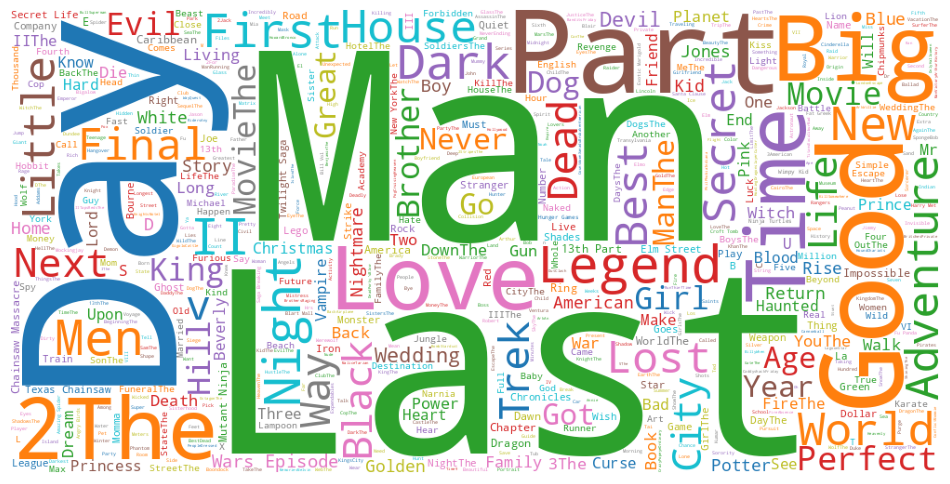

In [284]:
plt.figure(figsize=(12,8))
name_wc = WordCloud(
                    width=1000,
                    height=500,
                    max_words=1000,
                    background_color="white",
                    colormap=('tab10')
                    ).generate(''.join(df.name))
font = {##'weight': 'bold',
        'size': 24,
        }
plt.imshow(name_wc)
plt.axis('off')
plt.show()

### Análise Coluna RATING

In [285]:
rating_count = df.rating.value_counts()
print(rating_count)

rating
R            2597
PG-13        1729
PG            907
G             111
Not Rated      44
Unrated        17
NC-17          12
TV-MA           2
Approved        1
X               1
Name: count, dtype: int64


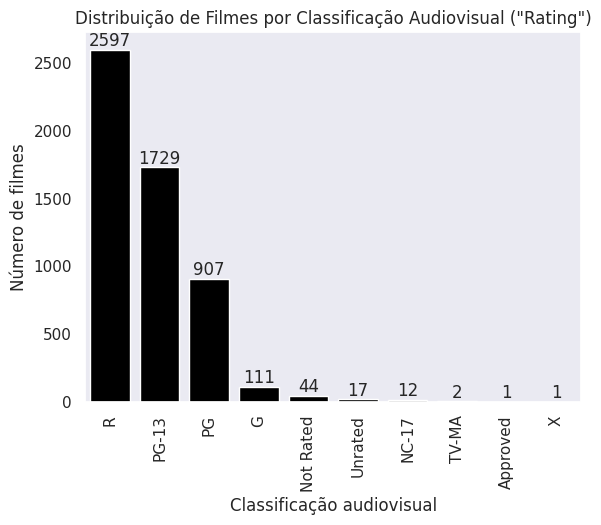

In [286]:
ax = sns.barplot(data=rating_count, color='black')

for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Classificação audiovisual')
plt.ylabel('Número de filmes')
plt.title('Distribuição de Filmes por Classificação Audiovisual ("Rating")', fontdict=font_title_graphs)
plt.xticks(rotation=90)
plt.show()

### Análise Coluna GENRE

In [287]:
genre_count = df.genre.value_counts()

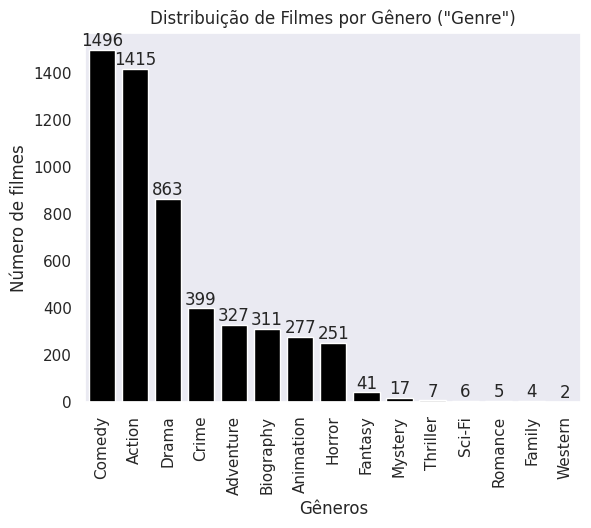

In [288]:
ax = sns.barplot(data=genre_count, color='black')

for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Gêneros')
plt.ylabel('Número de filmes')
plt.title('Distribuição de Filmes por Gênero ("Genre")', fontdict=font_title_graphs)
plt.xticks(rotation=90)
plt.show()

### Análise Coluna DIRECTOR (TOP 10)

In [289]:
director_count = df.director.value_counts().head(10)

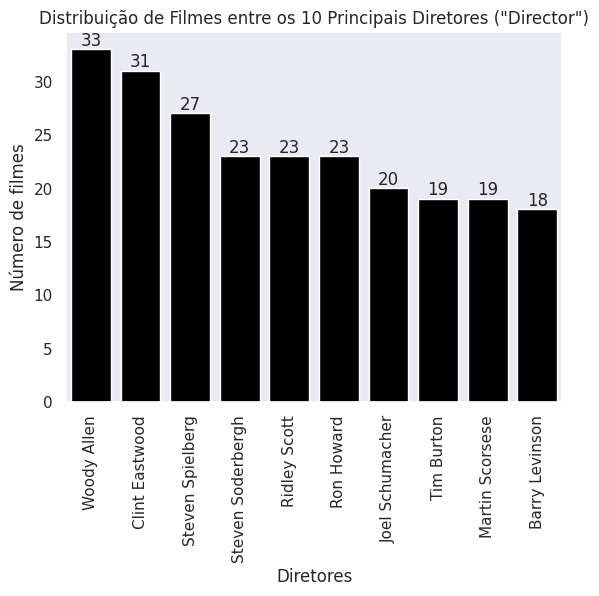

In [290]:
ax = sns.barplot(data=director_count, color='black')

for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Diretores')
plt.ylabel('Número de filmes')
plt.title('Distribuição de Filmes entre os 10 Principais Diretores ("Director")', fontdict=font_title_graphs)
plt.xticks(rotation=90)
plt.show()

### Análise Coluna WRITER (TOP 10)

In [291]:
writer_count = df.writer.value_counts().head(10)

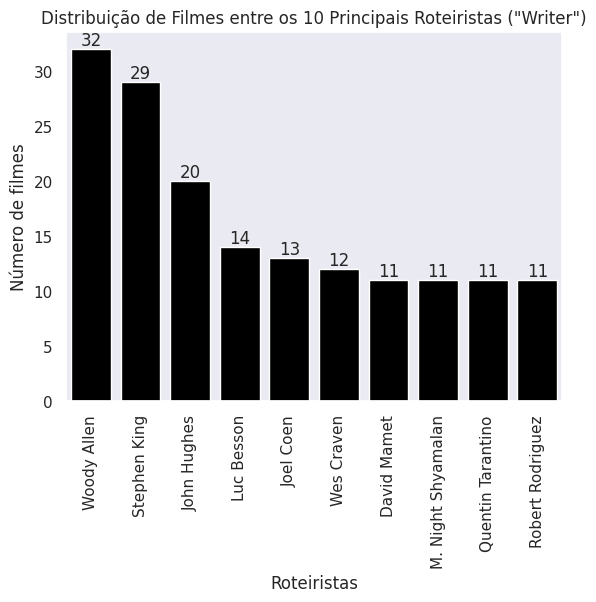

In [292]:
ax = sns.barplot(data=writer_count, color='black')

for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Roteiristas')
plt.ylabel('Número de filmes')
plt.title('Distribuição de Filmes entre os 10 Principais Roteiristas ("Writer")', fontdict=font_title_graphs)
plt.xticks(rotation=90)
plt.show()

### Análise Coluna STAR (TOP 10)

In [293]:
star_count = df.star.value_counts().head(10)

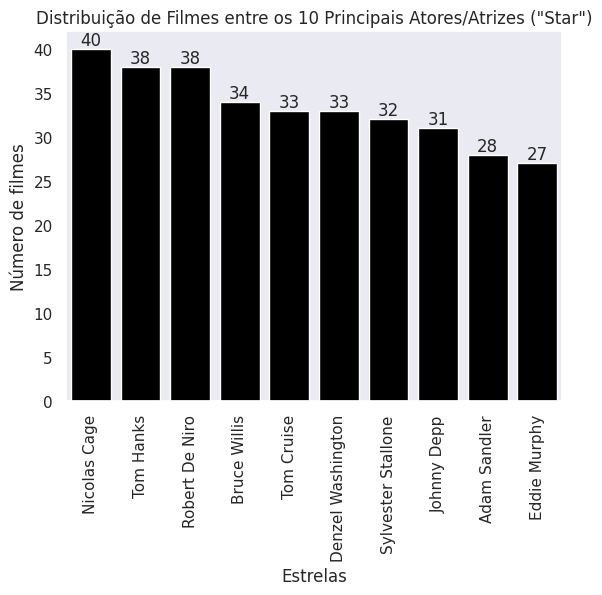

In [294]:
ax = sns.barplot(data=star_count, color='black')

for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Estrelas')
plt.ylabel('Número de filmes')
plt.title('Distribuição de Filmes entre os 10 Principais Atores/Atrizes ("Star")', fontdict=font_title_graphs)
plt.xticks(rotation=90)
plt.show()

### Análise Coluna COUNTRY (TOP 10)

In [295]:
country_count = df.country.value_counts().head(10)

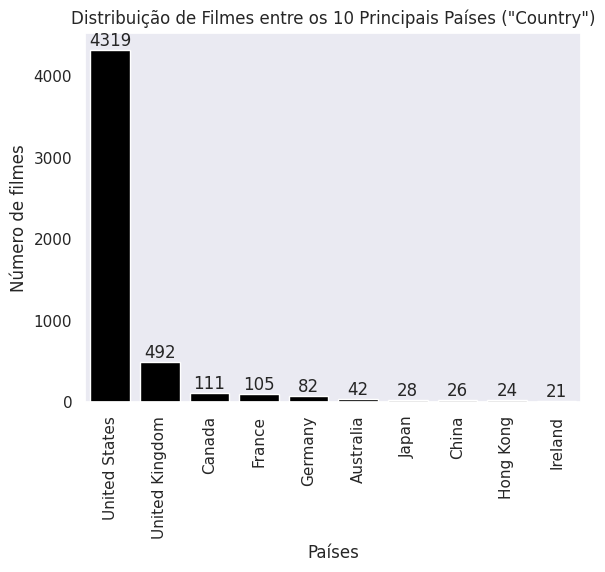

In [296]:
ax = sns.barplot(data=country_count, color='black')

for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Países')
plt.ylabel('Número de filmes')
plt.title('Distribuição de Filmes entre os 10 Principais Países ("Country")', fontdict=font_title_graphs)
plt.xticks(rotation=90)
plt.show()

### Análise Coluna COMPANY (TOP 10)

In [297]:
company_count = df.company.value_counts().head(10)

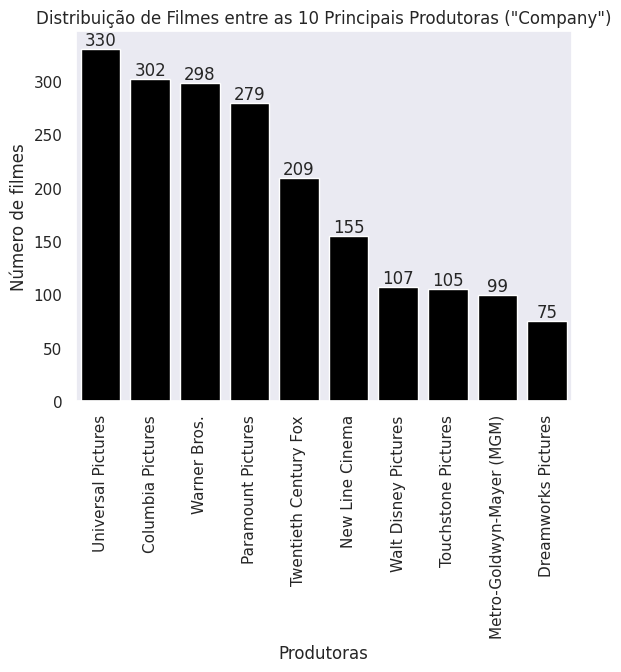

In [298]:
ax = sns.barplot(data=company_count, color='black')

for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Produtoras')
plt.ylabel('Número de filmes')
plt.title('Distribuição de Filmes entre as 10 Principais Produtoras ("Company")', fontdict=font_title_graphs)
plt.xticks(rotation=90)
plt.show()

# Análise Quantitativas

In [299]:
year_count = df.year.value_counts()
print(year_count)

year
2002    173
2009    171
2008    171
2005    170
2001    164
2010    164
2014    163
2006    163
2000    162
2012    162
1999    162
2013    161
2011    160
2003    159
2016    158
2004    158
2007    157
2015    156
1997    149
1998    148
1996    144
2018    143
1993    140
1995    138
2017    133
1992    131
1988    130
1994    128
1989    115
2019    113
1991    113
1990    111
1987    104
1986     99
1985     95
1984     88
1983     83
1982     71
1981     63
1980     40
2020      8
Name: count, dtype: int64


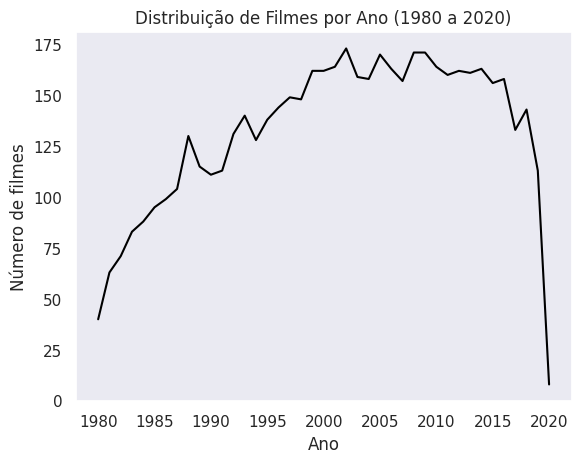

In [300]:
ax = sns.lineplot(data=year_count, color='black')

plt.xlabel('Ano')
plt.ylabel('Número de filmes')
plt.title('Distribuição de Filmes por Ano (1980 a 2020)', fontdict=font_title_graphs)
plt.show()

In [301]:
df.describe()

,year,score,votes,budget,gross,runtime
count,5421.00,5421.00,5421.00,5421.00,5421.00,5421.00
mean,2001.66,6.39,115066.13,36009170.47,103229653.33,108.15
std,10.54,0.96,184407.26,41573373.99,187302717.15,18.12
min,1980.00,1.90,195.00,6000.00,309.00,63.00
25%,1993.00,5.80,19000.00,10000000.00,10736401.00,95.00
50%,2002.00,6.50,52000.00,21800000.00,36869414.00,105.00
75%,2011.00,7.10,129000.00,45000000.00,112462508.00,118.00
max,2020.00,9.30,2400000.00,356000000.00,2847246203.00,271.00


In [302]:
df.mean(numeric_only='true')

year           2001.66
score             6.39
votes        115066.13
budget     36009170.47
gross     103229653.33
runtime         108.15
dtype: float64

In [303]:
df.median(numeric_only='true')

year          2002.00
score            6.50
votes        52000.00
budget    21800000.00
gross     36869414.00
runtime        105.00
dtype: float64

In [304]:
df.mode(numeric_only='true')

,year,score,votes,budget,gross,runtime
0,2002,6.40,15000.00,20000000.00,14000000.00,101.00


In [305]:
df.skew(numeric_only='true')

year      -0.19
score     -0.63
votes      4.33
budget     2.44
gross      4.67
runtime    1.43
dtype: float64

In [306]:
df.std(numeric_only='true')

year             10.54
score             0.96
votes        184407.26
budget     41573373.99
gross     187302717.15
runtime          18.12
dtype: float64

In [307]:
corr = df.corr(numeric_only='true')
corr

,year,score,votes,budget,gross,runtime
year,1.00,0.06,0.21,0.33,0.27,0.08
score,0.06,1.00,0.47,0.07,0.22,0.41
votes,0.21,0.47,1.00,0.44,0.61,0.35
budget,0.33,0.07,0.44,1.00,0.74,0.32
gross,0.27,0.22,0.61,0.74,1.00,0.28
runtime,0.08,0.41,0.35,0.32,0.28,1.00


<Axes: >

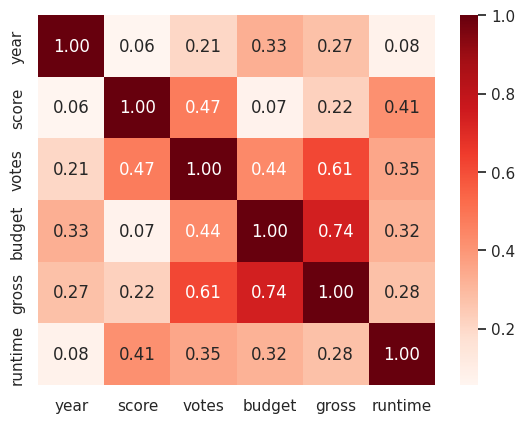

In [308]:
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Reds')

# Gráficos Top 10

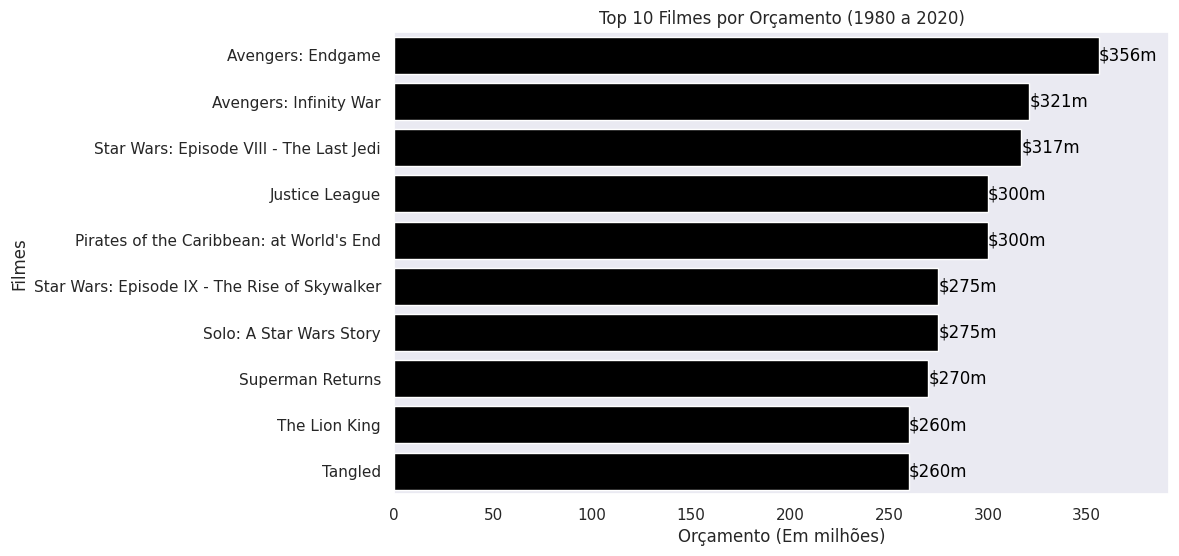

In [309]:
# TOP 10 ORÇAMENTO
df = pd.read_csv('movies_clean_python.csv')

# Ordenar pelo orçamento e selecionar os 10 principais
top10_budget = df.sort_values(by='budget', ascending=False).head(10)

# Converter orçamento para milhões
top10_budget['budget_million'] = top10_budget['budget'] / 1000000

# Criar o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='budget_million', y='name', data=top10_budget, color='black')

# Adicionar os valores das barras em milhões
for index, value in enumerate(top10_budget['budget_million']):
    plt.text(value, index, f'${value:,.0f}m', color='black', va="center")

max_budget = top10_budget['budget_million'].max()
plt.xlim(0, max_budget * 1.1)

plt.xlabel('Orçamento (Em milhões)')
plt.ylabel('Filmes')
plt.title('Top 10 Filmes por Orçamento (1980 a 2020)')
plt.show()

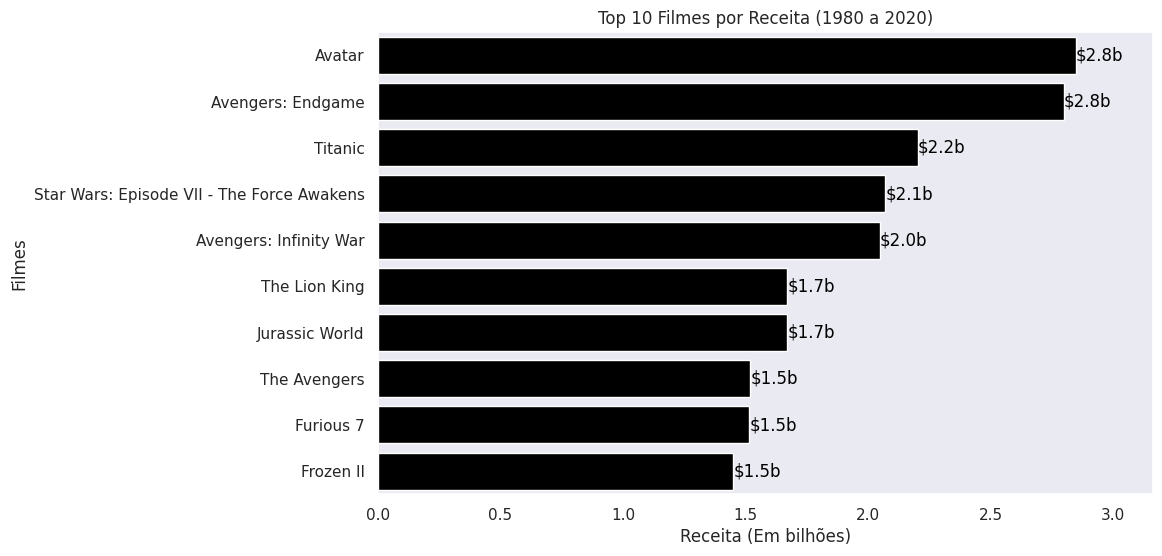

In [310]:
# TOP 10 RECEITA
df = pd.read_csv('movies_clean_python.csv')

top10_gross = df.sort_values(by='gross', ascending=False).head(10)

top10_gross['gross_billion'] = top10_gross['gross'] / 1000000000

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='gross_billion', y='name', data=top10_gross, color='black')

for index, value in enumerate(top10_gross['gross_billion']):
    plt.text(value, index, f'${value:,.1f}b', color='black', va="center")

max_gross = top10_gross['gross_billion'].max()
plt.xlim(0, max_gross * 1.11)

plt.xlabel('Receita (Em bilhões)')
plt.ylabel('Filmes')
plt.title('Top 10 Filmes por Receita (1980 a 2020)')
plt.show()

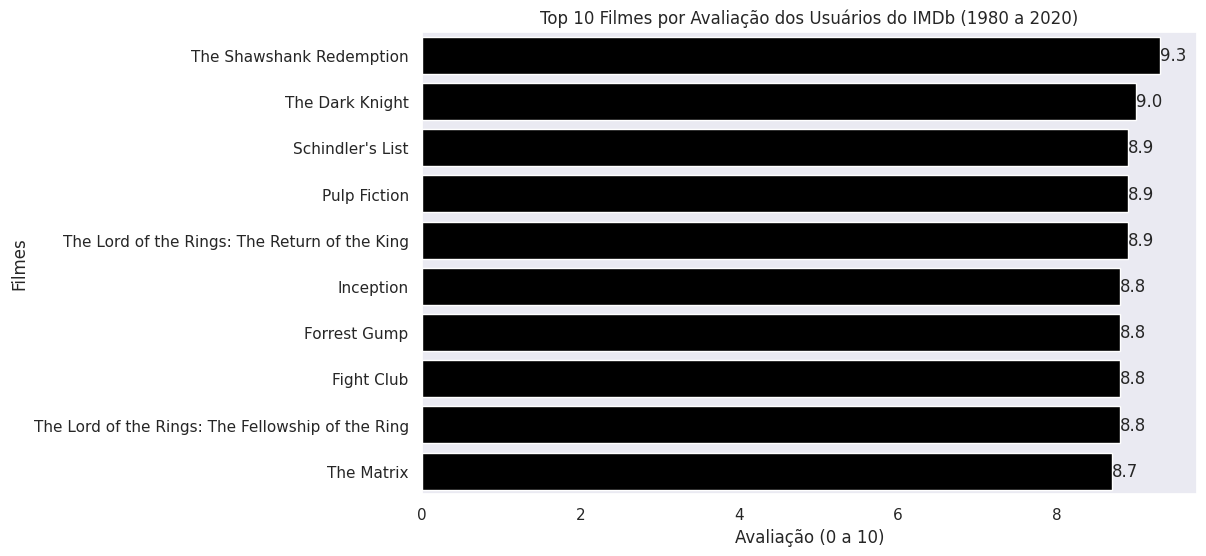

In [311]:
# TOP 10 SCORE
df = pd.read_csv('movies_clean_python.csv')

top10_score = df.sort_values(by='score', ascending=False).head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='score', y='name', data=top10_score, color='black')

for index, value in enumerate(top10_score['score']):
    ax.text(value, index, f'{value:.1f}', va='center')

plt.xlabel('Avaliação (0 a 10)')
plt.ylabel('Filmes')
plt.title('Top 10 Filmes por Avaliação dos Usuários do IMDb (1980 a 2020)')
plt.show()

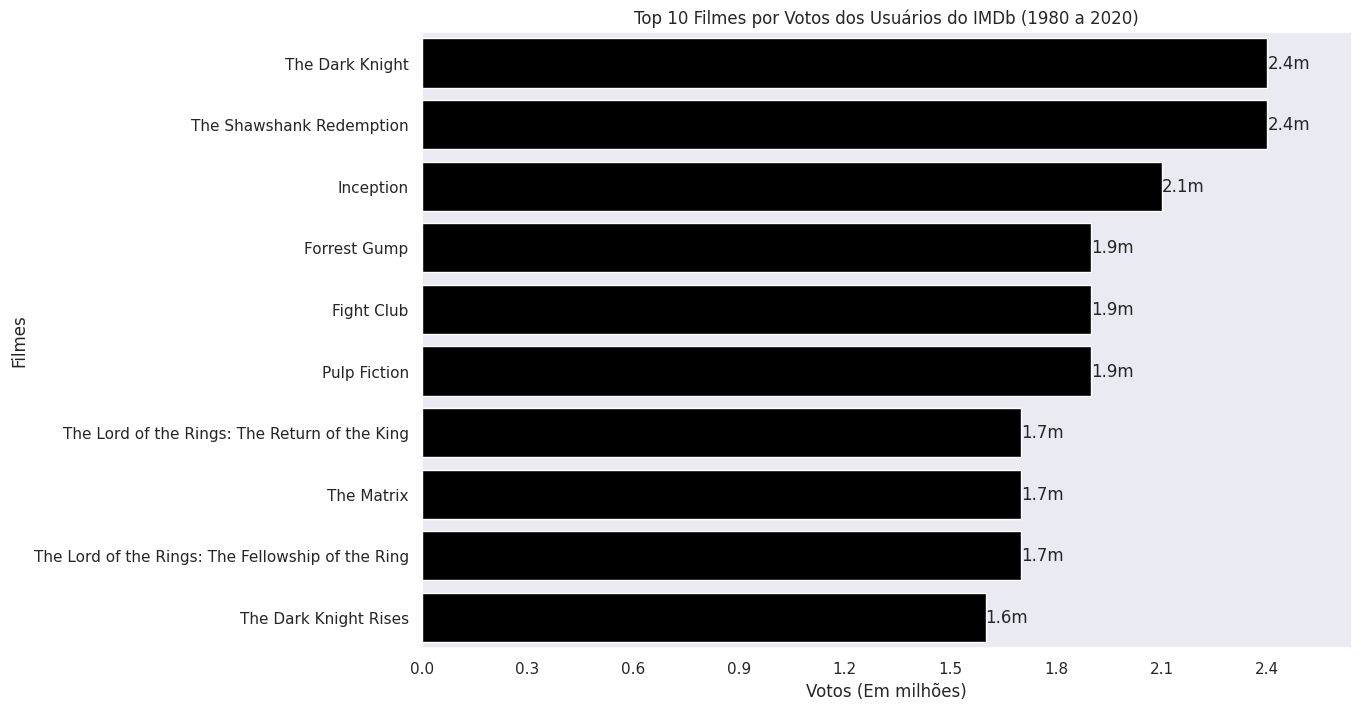

In [312]:
# TOP 10 VOTES
from matplotlib.ticker import FuncFormatter, MaxNLocator

df = pd.read_csv('movies_clean_python.csv')

top10_votes = df.sort_values(by='votes', ascending=False).head(10)

plt.figure(figsize=(12, 8))

ax = sns.barplot(x='votes', y='name', data=top10_votes, color='black')

def format_value(value, pos):
    if value >= 1e6:
        return f'{value / 1e6:.1f}m'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}k'
    else:
        return f'{value:.0f}'

for index, value in enumerate(top10_votes['votes']):
    ax.text(value, index, format_value(value, None), va='center', ha='left')

# Ajustar os limites do eixo x para adicionar mais espaço nas bordas
plt.xlim(0, top10_votes['votes'].max() * 1.1)

# Ajustar o eixo x para usar somente inteiros
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Formatar os ticks do eixo x para mostrar valores em mil
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{float(x/1000000)}'))

plt.xlabel('Votos (Em milhões)')
plt.ylabel('Filmes')
plt.title('Top 10 Filmes por Votos dos Usuários do IMDb (1980 a 2020)')
plt.show()

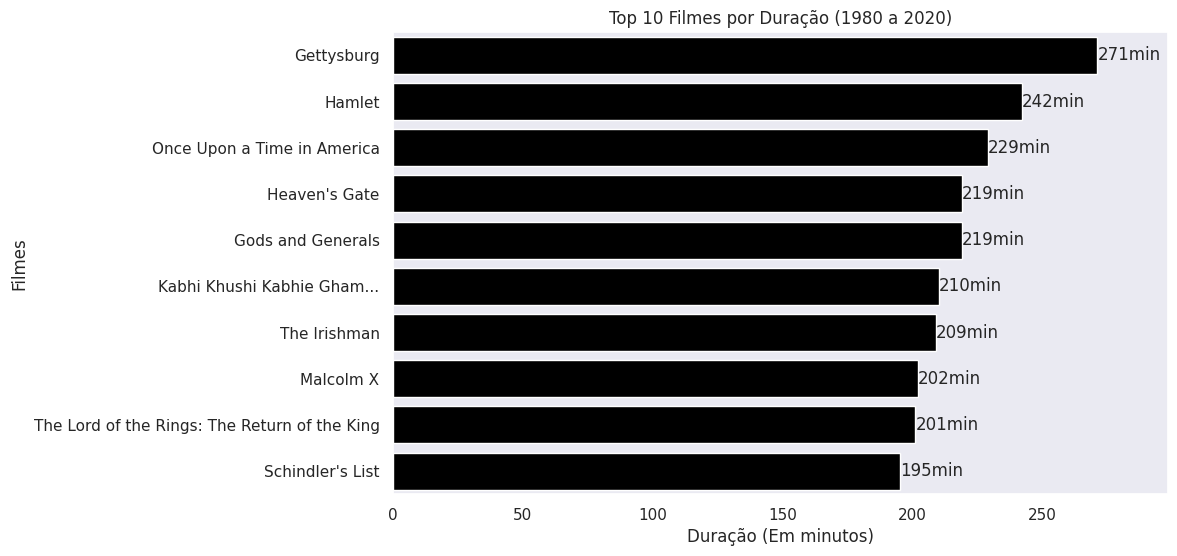

In [313]:
# TOP 10 RUNTIME
df = pd.read_csv('movies_clean_python.csv')

top10_runtime = df.sort_values(by='runtime', ascending=False).head(10)

plt.figure(figsize=(10, 6))

ax = sns.barplot(x='runtime', y='name', data=top10_runtime, color='black')

for index, value in enumerate(top10_runtime['runtime']):
    ax.text(value, index, f'{value:.0f}min', va='center')

plt.xlim(0, top10_runtime['runtime'].max() * 1.1)

plt.xlabel('Duração (Em minutos)')
plt.ylabel('Filmes')
plt.title('Top 10 Filmes por Duração (1980 a 2020)')
plt.show()

# Combinações Qualitativas

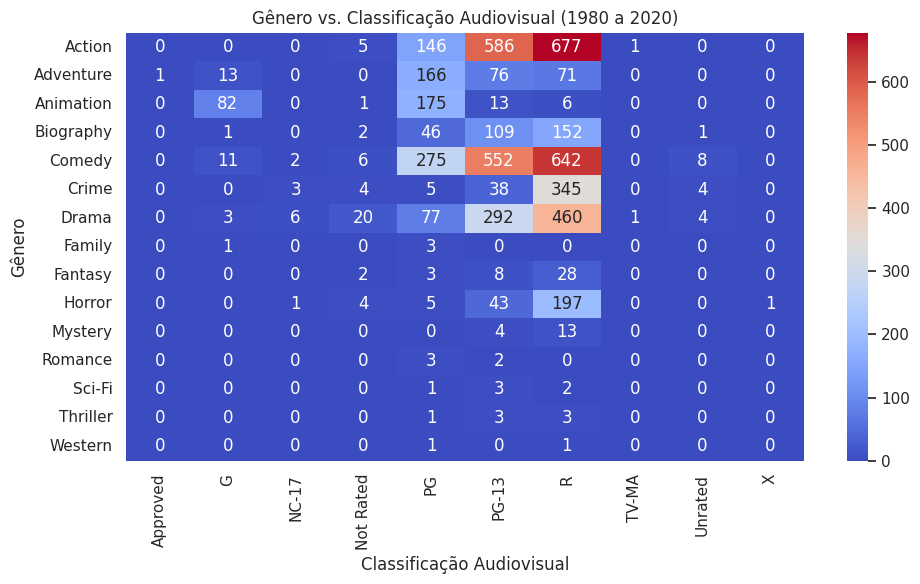

In [314]:
#GÊNERO X RATING
df_genrexrating = pd.crosstab(df['genre'], df['rating'])

plt.figure(figsize=(10, 6))
sns.heatmap(df_genrexrating, annot=True, cmap='coolwarm', fmt='d')
plt.title('Gênero vs. Classificação Audiovisual (1980 a 2020)')
plt.xlabel('Classificação Audiovisual')
plt.ylabel('Gênero')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

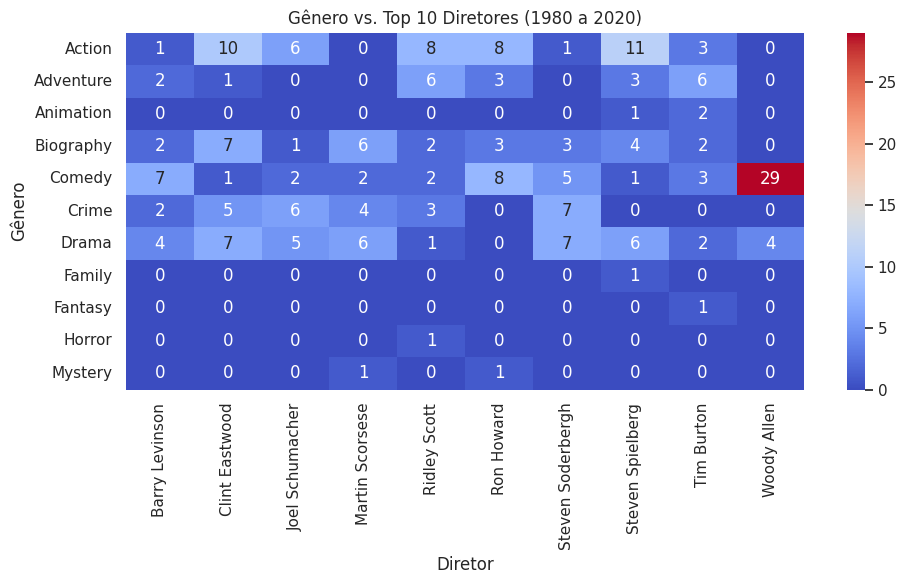

In [315]:
#GÊNERO X DIRETOR

top_10_diretores = df['director'].value_counts().head(10).index.tolist()

filmes_top_10_diretores = df[df['director'].isin(top_10_diretores)]

df_genrexdirector = pd.crosstab(filmes_top_10_diretores['genre'], filmes_top_10_diretores['director'])

plt.figure(figsize=(10, 6))
sns.heatmap(df_genrexdirector, annot=True, cmap='coolwarm', fmt='d')
plt.title('Gênero vs. Top 10 Diretores (1980 a 2020)')
plt.xlabel('Diretor')
plt.ylabel('Gênero')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

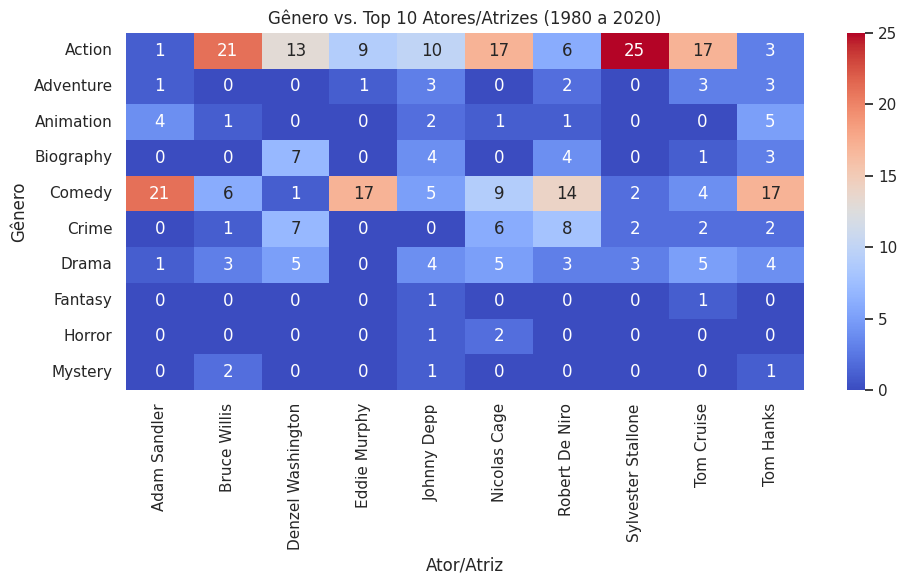

In [316]:
#GÊNERO X STAR

top_10_star = df['star'].value_counts().head(10).index.tolist()

filmes_top_10_star = df[df['star'].isin(top_10_star)]

df_genrexstar = pd.crosstab(filmes_top_10_star['genre'], filmes_top_10_star['star'])

plt.figure(figsize=(10, 6))
sns.heatmap(df_genrexstar, annot=True, cmap='coolwarm', fmt='d')
plt.title('Gênero vs. Top 10 Atores/Atrizes (1980 a 2020)')
plt.xlabel('Ator/Atriz')
plt.ylabel('Gênero')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

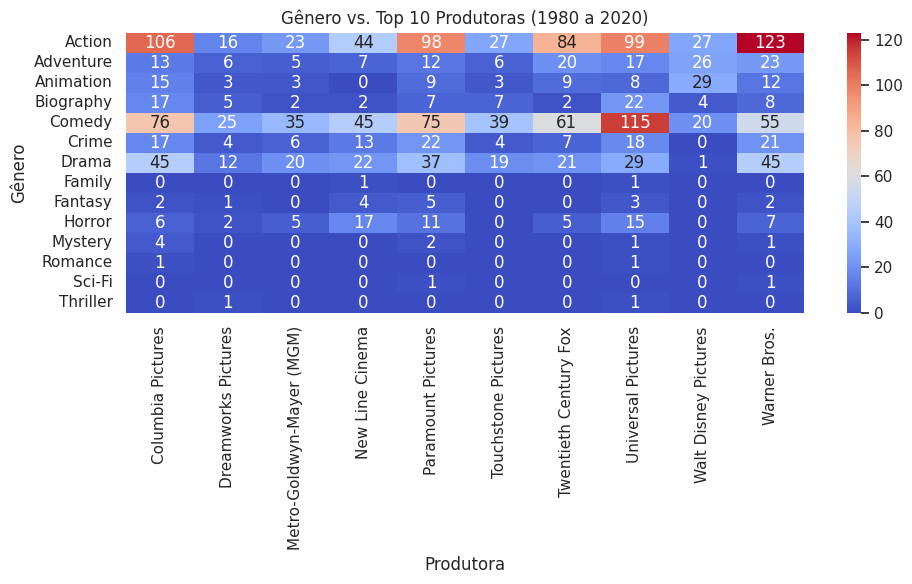

In [317]:
#GÊNERO X COMPANY

top_10_company = df['company'].value_counts().head(10).index.tolist()

filmes_top_10_company = df[df['company'].isin(top_10_company)]

df_genrexcompany = pd.crosstab(filmes_top_10_company['genre'], filmes_top_10_company['company'])

plt.figure(figsize=(10, 6))
sns.heatmap(df_genrexcompany, annot=True, cmap='coolwarm', fmt='d')
plt.title('Gênero vs. Top 10 Produtoras (1980 a 2020)')
plt.xlabel('Produtora')
plt.ylabel('Gênero')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

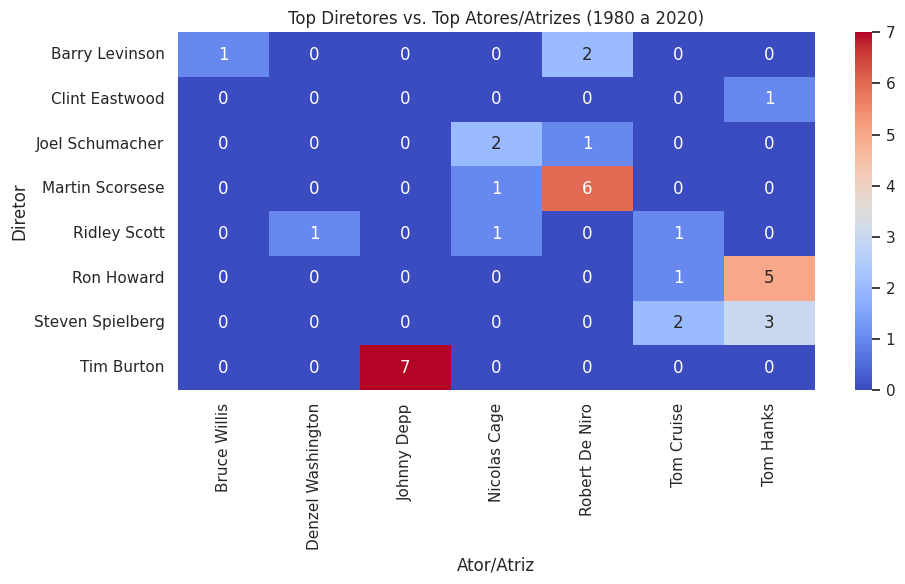

In [318]:
#DIRECTOR X STAR

# Selecionando apenas os filmes dos top 10 diretores e atores
top10_directorxstar = df[(df['director'].isin(top_10_diretores)) & (df['star'].isin(top_10_star))]

df_directorxstar = pd.crosstab(top10_directorxstar['director'], top10_directorxstar['star'])

plt.figure(figsize=(10, 6))
sns.heatmap(df_directorxstar, annot=True, cmap='coolwarm', fmt='d')
plt.title('Top Diretores vs. Top Atores/Atrizes (1980 a 2020)')
plt.xlabel('Ator/Atriz')
plt.ylabel('Diretor')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

# Boxplots

In [319]:
df.describe()

,year,score,votes,budget,gross,runtime
count,5421.00,5421.00,5421.00,5421.00,5421.00,5421.00
mean,2001.66,6.39,115066.13,36009170.47,103229653.33,108.15
std,10.54,0.96,184407.26,41573373.99,187302717.15,18.12
min,1980.00,1.90,195.00,6000.00,309.00,63.00
25%,1993.00,5.80,19000.00,10000000.00,10736401.00,95.00
50%,2002.00,6.50,52000.00,21800000.00,36869414.00,105.00
75%,2011.00,7.10,129000.00,45000000.00,112462508.00,118.00
max,2020.00,9.30,2400000.00,356000000.00,2847246203.00,271.00


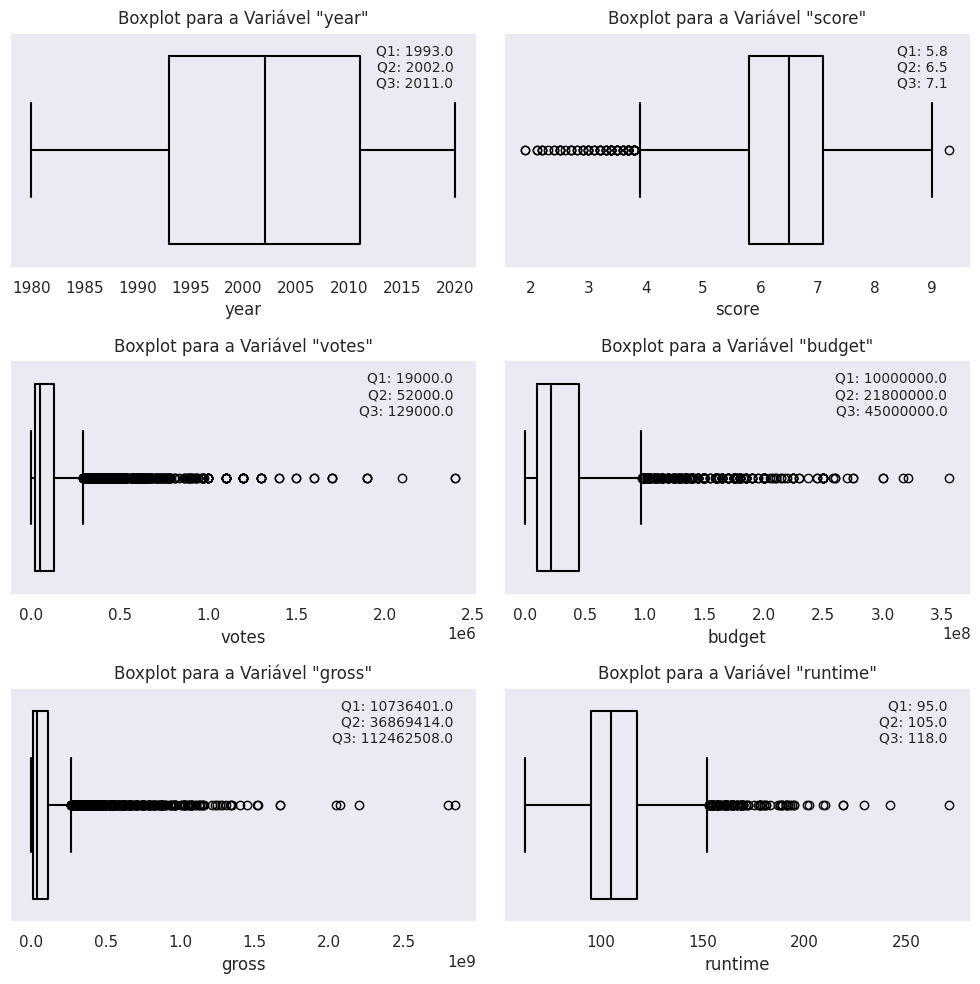

In [331]:
#BOXPLOTS
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10,10))

for i, var in enumerate(['year', 'score', 'votes', 'budget', 'gross', 'runtime']):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df[var], ax=axs[row, col], fill=False, color='Black', showfliers=True)
    axs[row, col].set_title(f'Boxplot para a Variável "{var}"')

    quartis = df[var].quantile([0.25, 0.5, 0.75])
    axs[row, col].text(0.95, 0.95, f'Q1: {quartis[0.25]:.1f}\nQ2: {quartis[0.5]:.1f}\nQ3: {quartis[0.75]:.1f}', 
                       transform=axs[row, col].transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right')

plt.tight_layout()
plt.show()

In [321]:
df.skew(numeric_only=True)

year      -0.19
score     -0.63
votes      4.33
budget     2.44
gross      4.67
runtime    1.43
dtype: float64

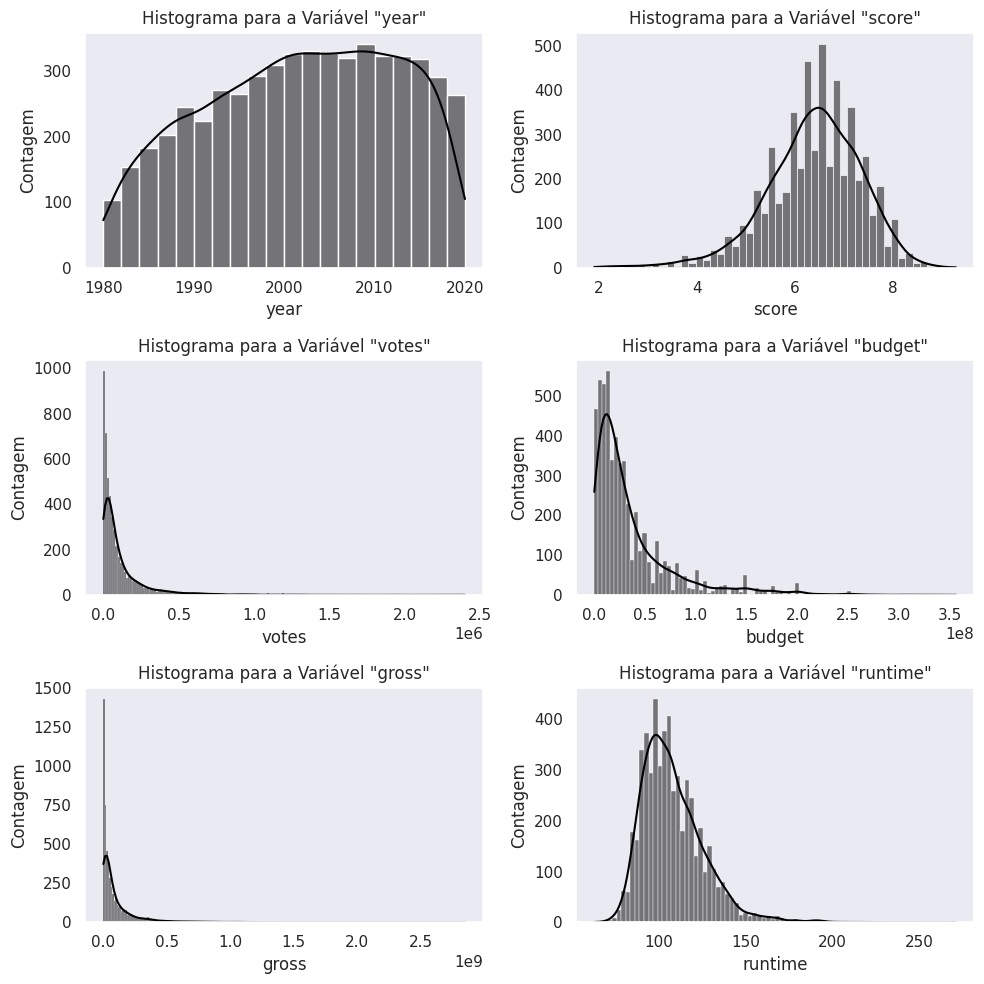

In [333]:
#HISTOGRAMAS
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

for i, var in enumerate(['year', 'score', 'votes', 'budget', 'gross', 'runtime']):
    row = i // 2
    col = i % 2
    sns.histplot(df[var], ax=axs[row, col], color='black', kde=True)
    axs[row, col].set_title(f'Histograma para a Variável "{var}"')
    axs[row, col].set_ylabel('Contagem')

plt.tight_layout()
plt.show()

# Combinações Quantitativas

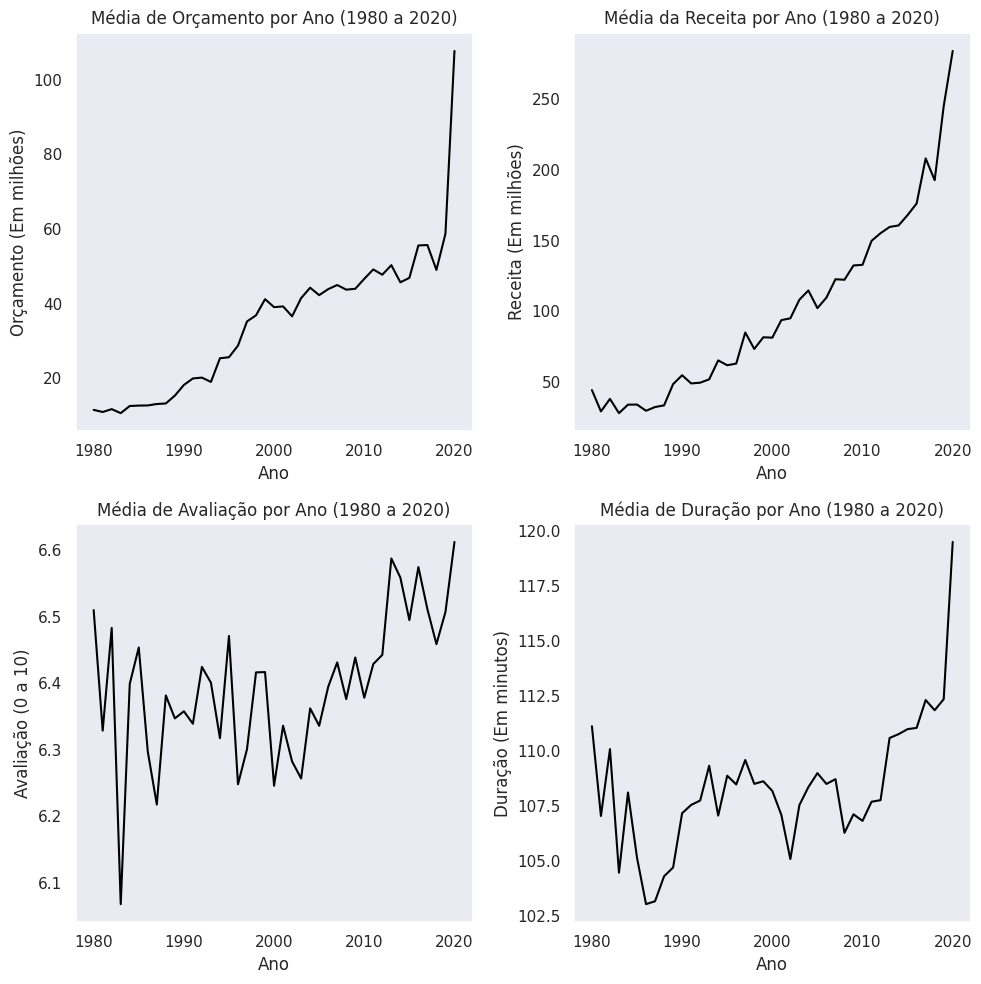

In [323]:
mean_gross_by_year = df.groupby('year')['gross'].mean()/1_000_000
mean_budget_by_year = df.groupby('year')['budget'].mean()/1_000_000
mean_score_by_year = df.groupby('year')['score'].mean()
mean_runtime_by_year = df.groupby('year')['runtime'].mean()

sns.set(style="dark")

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.lineplot(data=mean_budget_by_year, ax=axs[0, 0], color='black')
axs[0, 0].set_title('Média de Orçamento por Ano (1980 a 2020)')
axs[0, 0].set_xlabel('Ano')
axs[0, 0].set_ylabel('Orçamento (Em milhões)')

sns.lineplot(data=mean_gross_by_year, ax=axs[0, 1], color='black')
axs[0, 1].set_title('Média da Receita por Ano (1980 a 2020)')
axs[0, 1].set_xlabel('Ano')
axs[0, 1].set_ylabel('Receita (Em milhões)')

sns.lineplot(data=mean_score_by_year, ax=axs[1, 0], color='black')
axs[1, 0].set_title('Média de Avaliação por Ano (1980 a 2020)')
axs[1, 0].set_xlabel('Ano')
axs[1, 0].set_ylabel('Avaliação (0 a 10)')

sns.lineplot(data=mean_runtime_by_year, ax=axs[1, 1], color='black')
axs[1, 1].set_title('Média de Duração por Ano (1980 a 2020)')
axs[1, 1].set_xlabel('Ano')
axs[1, 1].set_ylabel('Duração (Em minutos)')

plt.tight_layout()

plt.show()


# Combinações Qualitativas x Quantitativas